# Including Other Formats

## Overview

HTML pages (either standalone or in a website) can automatically include
links to other formats specified in the document front matter. For
example, the following document front matter:

``` yaml
title: Sample Page
author: Norah Jones
date: last-modified
toc: true
format: 
  html: default
  ipynb: default
```

Results in an HTML page that includes a link to the additional notebook
format in the right margin below the table of contents:

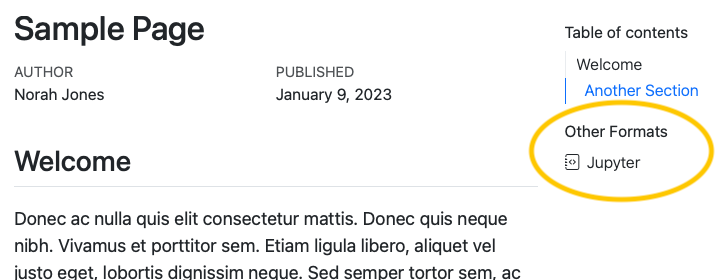

If a table of contents is enabled for the page, the additional formats
will be automatically placed within the table of contents as a new
section. If no table of contents is displayed, the additional formats
will be displayed in the right margin at the top of the document.

Links to additional formats are displayed by default, but you can
control whether they are shown or even which specific formats are
included with the `format-links` YAML option.

> **Rendering All Formats in Standalone HTML Documents**
>
> The Render button in RStudio, and the Preview button in Positron and
> VS Code, will not automatically render all formats if the document
> isn’t part of a Quarto website. To render all formats use
> `quarto render` on the command line:
>
> ``` bash
> quarto render multi-format.qmd
> ```

## Rendering Formats with the Same Extension

If your formats share a file extension, for example, both HTML pages and
Revealjs presentations use `.html`, their outputs will overwrite each
other. To include formats with the same extension, use `output-file` to
distinguish one. For example, to include a link to a RevealJS
presentation provide a distinct `output-file`:

``` yaml
title: Sample Page
format: 
  html: default
  revealjs: 
    output-file: document-revealjs.html
```

## Specifying Formats to Link

You can provide an explicit list of formats to include in the **Other
Formats** section by providing a list as the value for `format-links`.
For example, this document front matter will result in only the link to
the Jupyter notebook format, excluding the PDF format:

``` yaml
title: Sample Page
author: Norah Jones
date: last-modified
toc: true
format: 
  html: default
  ipynb: default
  pdf: default
format-links: [ipynb]
```

You can also customize the links by passing `format-links` an object
with keys:

-   `format`, the format to be linked
-   `text`, the text to be displayed for the link
-   `icon`, the name of a [Bootstrap
    icons](https://icons.getbootstrap.com)

For example, here a link to the `typst` format is displayed as the text
“PDF” along with a PDF file icon:

``` yaml
title: Sample Page
author: Norah Jones
date: last-modified
toc: true
format: 
  html: default
  typst: default
format-links:
  - html
  - format: typst
    text: PDF
    icon: file-pdf
```

You can also provide `format-links` items using the same options as
[Code Links and Other
Links](html-basics.html#code-links-and-other-links). For example, rather
than another format, you could to add a link to an external URL:

``` yaml
format-links:
  - text: Other Link
    href: https://quarto.org/
    icon: hand-thumbs-up
```

## Hiding All Links

To prevent format links from being shown at all, specify
`format-links: false` in your document front matter. For example this
front matter will not display the **Other Formats** links:

``` yaml
title: Sample Page
author: Norah Jones
date: last-modified
toc: true
format: 
  html: default
  ipynb: default
format-links: false
```

## Controlling Formats at a Project Level

In a Quarto Project, to control the formats and their behavior for a
specific folder, provide the `format` and `format-links` options in a
`_metadata.yml` file. Similarly, you can specify these options for an
entire project by including them in the `_quarto.yml` project file. See
[Directory
Metadata](../../docs/projects/quarto-projects.qmd#directory-metadata) or
[Project
Metadata](../../docs/projects/quarto-projects.qmd#project-metadata) for
additional details.

The `format` option isn’t merged like all other
[metadata](../../docs/projects/quarto-projects.qmd#metadata-merging)
across `_quarto.yml`, `_metadata.yml`, and the document YAML. If you
have some formats specified at a project or directory level, you’ll also
need to explicitly list them in the document YAML. For example, suppose
you have HTML options set at the project level:

``` yaml
format:
  html:
    toc: true
```

In order to get an HTML document with a link to the PDF format, you’ll
need to list both formats in the YAML header:

``` yaml
format: 
  html: default
  pdf: default
```